# 1 Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data
train = pd.read_csv('train.csv', index_col= 'PassengerId')
test = pd.read_csv('test.csv', index_col= 'PassengerId')

In [3]:
#concatenate train and test for data visualization
raw = pd.concat([train, test])
raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 Drop/Fill NA (Fare, Embarked)

In [4]:
df_drop= raw.copy()

In [5]:
df_drop['AgeIsNull'] = pd.isnull(df_drop['Age']).astype(int)
df_drop['CabinIsNull'] = pd.isnull(df_drop['Cabin']).astype(int)

In [6]:
df_drop.isnull().sum().sort_values(ascending= False).head(6)

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
Pclass         0
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending= False).head(6)

Cabin     327
Age        86
Fare        1
Pclass      0
Name        0
Sex         0
dtype: int64

as we see, all missing 'Embarked' values come from train, so we can drop them

In [8]:
df_drop.dropna(subset=['Embarked'], inplace= True)

there is one missing 'Fare' value in test

In [9]:
df_drop[df_drop['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNull,CabinIsNull
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,1


In [10]:
df_drop.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'AgeIsNull', 'CabinIsNull'],
      dtype='object')

Lets use [Embarkment, Age, PClass, SibSp, Parch] to find a good estimate of the fare.

In [11]:
df_drop[df_drop['Embarked'] == 'S'][df_drop['Pclass'] == 3][df_drop['Age'] >= 45][df_drop['SibSp'] == 0][df_drop['Parch'] == 0].describe()

C:\Users\citru\AppData\Local\Temp\ipykernel_7092\1472484259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop[df_drop['Embarked'] == 'S'][df_drop['Pclass'] == 3][df_drop['Age'] >= 45][df_drop['SibSp'] == 0][df_drop['Parch'] == 0].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,AgeIsNull,CabinIsNull
count,16.000000,17.0,17.000000,17.0,17.0,16.000000,17.0,17.0
mean,0.125000,3.0,53.058824,0.0,0.0,7.292713,0.0,1.0
std,0.341565,0.0,8.021226,0.0,0.0,2.096020,0.0,0.0
min,0.000000,3.0,45.000000,0.0,0.0,0.000000,0.0,1.0
25%,0.000000,3.0,47.000000,0.0,0.0,7.201050,0.0,1.0
50%,0.000000,3.0,51.000000,0.0,0.0,7.762500,0.0,1.0
75%,0.000000,3.0,59.000000,0.0,0.0,8.050000,0.0,1.0
max,1.000000,3.0,74.000000,0.0,0.0,9.587500,0.0,1.0


7.5 is close to both mean and median

In [12]:
df_drop['Fare'].fillna(7.5, inplace= True)

# 3 Names

In [13]:
df_names= df_drop.copy()
# removing everything from the names before the comma and after the dot, so we have only titles
df_names['Title'] = df_names['Name'].str.split(', ').str[1]
df_names['Title'] = df_names['Title'].str.split('.').str[0]
df_names.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNull,CabinIsNull,Title
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr


In [14]:
df_names['Title'].value_counts().head()

Mr        757
Miss      259
Mrs       196
Master     61
Rev         8
Name: Title, dtype: int64

In [15]:
df_names['Title'] = df_names['Title'].map({'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master'})
df_names['Title'].fillna('other', inplace= True)

In [16]:
df_names['Title'].value_counts()

Mr        757
Miss      259
Mrs       196
Master     61
other      34
Name: Title, dtype: int64

In [17]:
df_names["Surname"] = df_names['Name'].str.split(',').str.get(0)

In [18]:
for i in df_names['Surname'].iteritems():
    # English
    if i[1].endswith('ley') or i[1].endswith("ers") or i[1].endswith("en") or i[1].endswith("ton") or i[1].endswith("ing") or i[1].endswith("ings"):
        df_names.loc[i[0],'Ethnicity'] = 'English'
    # Irish
    if i[1].startswith('Mc') or i[1].startswith("O'") or i[1].startswith("Fitz") or i[1].endswith("ty"):
        df_names.loc[i[0],'Ethnicity'] = 'Irish'
    # Scandinavian
    if i[1].endswith('son') or i[1].endswith('sen') or i[1].endswith('la') or i[1].endswith('lä') or i[1].endswith('nen'):
        df_names.loc[i[0],'Ethnicity'] = 'Scandinavian'
    # Scottish
    if i[1].startswith('Mac') or i[1].startswith('Mag'):
        df_names.loc[i[0],'Ethnicity'] = 'Scottish'
    # EasterEuropean
    if i[1].endswith('ski') or i[1].endswith('vic') or i[1].endswith('off') or i[1].endswith('cki') or i[1].endswith('dzki') or i[1].endswith('wicz') or i[1].endswith('czyk') or i[1].endswith('czak') or i[1].endswith('czek') or i[1].endswith('ek') or i[1].endswith('ak') or i[1].endswith('vić') or i[1].endswith('ov') or i[1].endswith('yev') or i[1].endswith('enko') or i[1].endswith('shin'):
        df_names.loc[i[0],'Ethnicity'] = 'EasternEuropean'
    # SouthernEuropean
    if i[1].startswith('De ') or i[1].startswith('Di ') or i[1].startswith('D ') or i[1].endswith('as') or i[1].endswith('is') or i[1].endswith('us') or i[1].endswith('es') or i[1].endswith('ez') or i[1].endswith('akis') or i[1].endswith('idis') or i[1].endswith('opoulos') or i[1].endswith('ni') or i[1].endswith('no') or i[1].endswith('zzi') or i[1].endswith('tti') or i[1].endswith('ero') or i[1].endswith('eri') or i[1].endswith('elli') or i[1].endswith('er') or i[1].endswith('ossi') or i[1].endswith('aldi'):
        df_names.loc[i[0],'Ethnicity'] = 'SouthernEuropean'
    # CentralEuropean
    if i[1].startswith('van ') or i[1].startswith('von ') or i[1].endswith('che') or i[1].endswith('elle') or i[1].endswith('er') or i[1].endswith('stein') or i[1].endswith('baum') or i[1].endswith('berg'):
        df_names.loc[i[0],'Ethnicity'] = 'CentralEuropean'

In [19]:
df_names.isnull().sum(axis=0)['Ethnicity']

810

In [20]:
sns.set(rc={'figure.figsize':(15,6)})
plt.style.use(['classic'])

<AxesSubplot:xlabel='Ethnicity', ylabel='Count'>

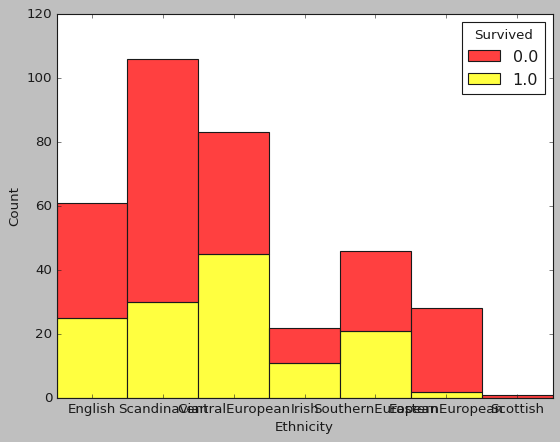

In [21]:
plt.grid(False)
sns.histplot(data= df_names, x= "Ethnicity", hue="Survived", multiple="stack", palette= 'autumn')

# 4 Fill NA (Age)

First of all let's create age group columns

In [22]:
df_age= df_names.copy()

In [23]:
df_age['Age'].describe()

count    1044.000000
mean       29.842596
std        14.390739
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [24]:
for i in df_age['Age'].iteritems():
    if i[1]<=15:
        df_age.loc[i[0],'AgeBand'] = 'Child'
    elif 15<i[1]<=30:
        df_age.loc[i[0],'AgeBand'] = 'Young'
    elif 30<i[1]<=45:
        df_age.loc[i[0],'AgeBand'] = 'Adult'
    elif 45<i[1]<=60:
        df_age.loc[i[0],'AgeBand'] = 'MidAge'
    elif 60<i[1]:
        df_age.loc[i[0],'AgeBand'] = 'Old'
    else:
        pass

In [25]:
df_age['AgeBand'].value_counts()

Young     494
Adult     281
MidAge    122
Child     115
Old        32
Name: AgeBand, dtype: int64

In [26]:
df_age["FMembers"]= df_age["Parch"]+ df_age["SibSp"]+ 1

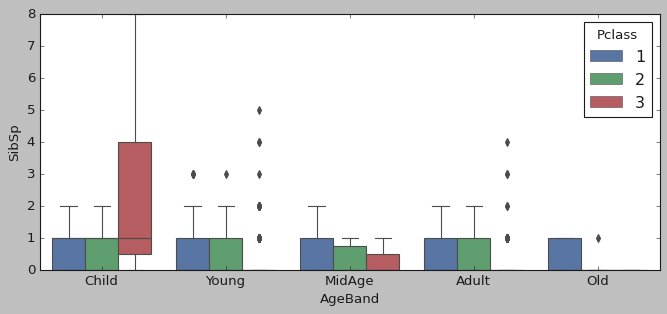

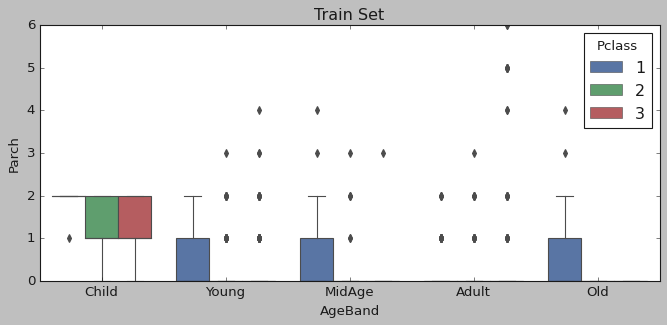

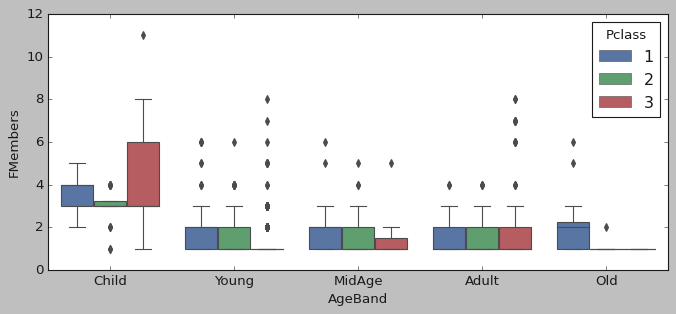

In [27]:
fig1, axis2 = plt.subplots(1,1,figsize=(10,4))
sns.boxplot(x=df_age["AgeBand"], y=df_age["SibSp"],
            hue=df_age["Pclass"],
            showfliers=True,order=["Child","Young","MidAge","Adult","Old"]) ;

fig1, axis2 = plt.subplots(1,1,figsize=(10,4))
sns.boxplot(x=df_age["AgeBand"], y=df_age["Parch"],
            hue=df_age["Pclass"],
            showfliers=True,order=["Child","Young","MidAge","Adult","Old"]).set_title("Train Set") ;

fig2, axis1 = plt.subplots(1,1,figsize=(10,4))
sns.boxplot(x=df_age["AgeBand"], y=df_age["FMembers"],
            hue=df_age["Pclass"],
            showfliers=True,order=["Child","Young","MidAge","Adult","Old"]) ;

If there are two Parents/Children the passenger will be categorized as 'underage'

In [28]:
for i in df_age['AgeBand'].iteritems():
    if type(df_age['AgeBand'][i[0]]) == float and df_age['Parch'][i[0]] == 2:
        df_age.loc[i[0],'AgeBand'] = 'Underage'
        df_age.loc[i[0],'Age'] = 7.5

If there are more than two Spouses/Siblings it is likely, that it is an underage passenger with many siblings.
Adult passengers are mostly alone, with one sibling/spouse or with many children rather than siblings.

In [29]:
for i in df_age['AgeBand'].iteritems():
    if type(df_age['AgeBand'][i[0]]) == float and df_age['SibSp'][i[0]] > 2:
        df_age.loc[i[0],'AgeBand'] = 'Underage'
        df_age.loc[i[0],'Age'] = 7.5

In [30]:
df_age['AgeBand'].isnull().sum()

243

In [31]:
df_age['Age'][np.isnan(df_age['Age'])] = np.random.randint(
                         df_age['Age'].mean() - df_age['Age'].std(),
                         df_age['Age'].mean() + df_age['Age'].std(),
                         size = df_age['Age'].isnull().sum()).astype(int)

C:\Users\citru\AppData\Local\Temp\ipykernel_7092\4228474246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Age'][np.isnan(df_age['Age'])] = np.random.randint(


In [32]:
for i in df_age['Age'].iteritems():
    if i[1]<=15:
        df_age.loc[i[0],'AgeBand'] = 'Child'
    elif 15<i[1]<=30:
        df_age.loc[i[0],'AgeBand'] = 'Young'
    elif 30<i[1]<=45:
        df_age.loc[i[0],'AgeBand'] = 'Adult'
    elif 45<i[1]<=60:
        df_age.loc[i[0],'AgeBand'] = 'MidAge'
    elif 60<i[1]:
        df_age.loc[i[0],'AgeBand'] = 'Old'
    else:
        pass

<AxesSubplot:xlabel='AgeBand', ylabel='Survived'>

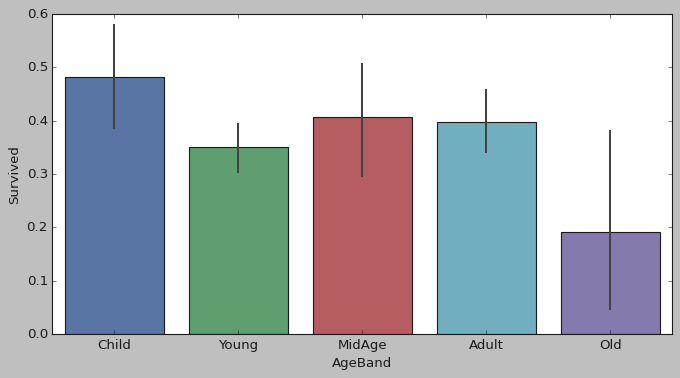

In [33]:
fig2, axis2 = plt.subplots(1,1,figsize=(10,5))
sns.barplot( x="AgeBand",
            y="Survived",
            order=["Child","Young","MidAge","Adult","Old"],
           data=df_age)

<AxesSubplot:xlabel='FMembers', ylabel='Survived'>

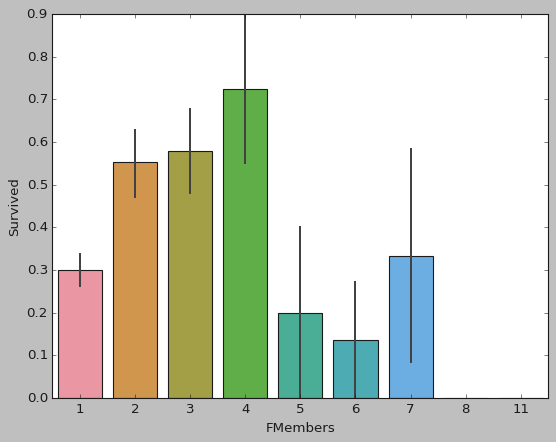

In [34]:
sns.barplot(x= 'FMembers', y= 'Survived', data= df_age)

In [35]:
age_map = {"Child": 1, "Young": 2, "MidAge": 3, "Adult": 4, "Old": 5}

df_age['AgeBand'] = df_age['AgeBand'].map(age_map)

In [36]:
df_age.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNull,CabinIsNull,Title,Surname,Ethnicity,AgeBand,FMembers
PassengerId,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr,Braund,NaN,2,2
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,Mrs,Cumings,English,4,2
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss,Heikkinen,Scandinavian,2,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,Mrs,Futrelle,CentralEuropean,4,2
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr,Allen,English,4,1


# 5 Cabin

In [37]:
df_cabin= df_age.copy()

In [38]:
df_cabin['Cabin'].describe()

count             293
unique            185
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [39]:
df_cabin['Cabin'].str[0].value_counts()

C    94
B    63
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [40]:
df_cabin['CabinClass']= df_cabin['Cabin'].str[0]
df_cabin['CabinClass']= df_cabin['CabinClass'].replace({'G': np.nan, 'T': np.nan})

# 6 Ticket

In [41]:
df_ticket= df_cabin.copy()

In [42]:
df_ticket['Ticket'].value_counts().head(28)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
3101295          7
S.O.C. 14879     7
347077           7
347082           7
113781           6
19950            6
347088           6
382652           6
PC 17757         5
16966            5
113503           5
220845           5
349909           5
4133             5
W./C. 6608       5
2666             4
36928            4
PC 17760         4
PC 17755         4
12749            4
17421            4
PC 17483         4
C.A. 34651       4
LINE             4
Name: Ticket, dtype: int64

# 7 Fare

In [43]:
df_fare= df_ticket.copy()

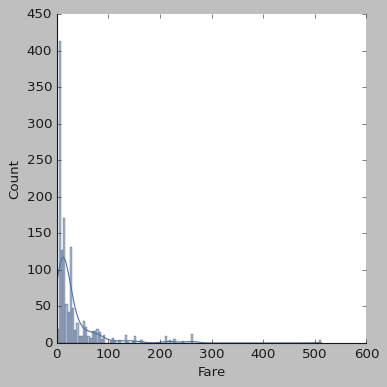

In [44]:
sns.displot(df_fare['Fare'], kde= True)

let's check z-scores, if there are any, they are right-sided

In [45]:
first_c= df_fare[df_fare['Pclass']== 1]['Fare']
sec_c= df_fare[df_fare['Pclass']== 2]['Fare']
third_c= df_fare[df_fare['Pclass']== 3]['Fare']

In [46]:
def z(XX):
    return XX.apply(lambda x: (x-XX.mean())/XX.std())

print(z(first_c).max())
print(z(sec_c).max())
print(z(third_c).max())

5.263872954076074
3.845104306154193
4.89674448402194


so, there are some right-side outliers (probably people who paid for their whole family, that's why there are 0s)

In [47]:
z1= first_c.apply(lambda x: np.nan if ((x-first_c.mean())/first_c.std()) > 3 else x)
z2= sec_c.apply(lambda x: np.nan if ((x-sec_c.mean())/sec_c.std()) > 3 else x)
z3= third_c.apply(lambda x: np.nan if ((x-third_c.mean())/third_c.std()) > 3 else x)

z= pd.concat([z1,z2,z3])
z.sort_index().head()

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64

In [48]:
df_fare['Fare']= z
df_fare['Fare'].describe()

count    1272.000000
mean       30.890058
std        44.680393
min         0.000000
25%         7.895800
50%        13.858300
75%        29.268750
max       263.000000
Name: Fare, dtype: float64

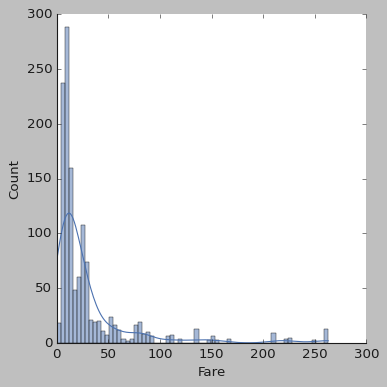

In [49]:
g = sns.displot(df_fare['Fare'], kde= True)


# 8 Get_dummies 

In [50]:
df_ticket.isnull().sum().sort_values(ascending= False).head(5)

CabinClass    1020
Cabin         1014
Ethnicity      810
Survived       418
AgeIsNull        0
dtype: int64

In [51]:
df_ticket.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeIsNull,CabinIsNull,Title,Surname,Ethnicity,AgeBand,FMembers,CabinClass
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Mr,Braund,NaN,2,2,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,Mrs,Cumings,English,4,2,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss,Heikkinen,Scandinavian,2,1,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,Mrs,Futrelle,CentralEuropean,4,2,C
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr,Allen,English,4,1,NaN


In [52]:
df_dummies= df_ticket.copy()

In [53]:
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['Pclass'], drop_first= True)], axis= 1)
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['Sex'], drop_first= True)], axis= 1)
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['Embarked'], drop_first= True)], axis= 1)
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['Title'], drop_first= True)], axis= 1)
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['Ethnicity'])], axis= 1)
df_dummies= pd.concat([df_dummies, pd.get_dummies(df_dummies['CabinClass'])], axis= 1)

In [54]:
df_dummies.drop(columns= ['Name','Pclass', 'Ticket', 'Sex', 'Embarked', 'Title', 'Ethnicity', 'CabinClass', 'Cabin', 'Surname'], inplace= True)

In [55]:
df_dummies.head()

,Survived,Age,SibSp,Parch,Fare,AgeIsNull,CabinIsNull,AgeBand,FMembers,2,...,Irish,Scandinavian,Scottish,SouthernEuropean,A,B,C,D,E,F
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,7.2500,0,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,38.0,1,0,71.2833,0,0,4,2,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,26.0,0,0,7.9250,0,1,2,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,35.0,1,0,53.1000,0,0,4,2,0,...,0,0,0,0,0,0,1,0,0,0
5,0.0,35.0,0,0,8.0500,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0


# 9 Balancing

In [ ]:
from imblearn.over_sampling import SMOTE

In [67]:
df_balance= df_dummies.copy()
df_balance[df_balance['Survived'].notnull()]['Survived'].value_counts()

0.0    549
1.0    340
Name: Survived, dtype: int64

In [97]:
549/(549+340)

0.6175478065241845

As we see, data is a little unbalanced, so let's balance it

In [98]:
X_train_unbalanced= df_balance[df_balance['Survived'].notnull()].drop(columns= ['Survived'])
y_train_unbalanced= df_balance[df_balance['Survived'].notnull()]['Survived']

In [100]:
oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train_unbalanced, y_train_unbalanced)

C:\DS\Anaconda\envs\Env1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [101]:
y_train_balanced.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

# 10 Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [104]:
X_test_un= df_dummies[df_dummies['Survived'].isnull()].drop(columns= ['Survived'])

In [105]:
StSc= StandardScaler()
X_train = StSc.fit_transform(X_train_balanced)
X_test= StSc.transform(X_test_un)

C:\DS\Anaconda\envs\Env1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\DS\Anaconda\envs\Env1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\DS\Anaconda\envs\Env1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [111]:
print(X_train.shape)
print(y_train_balanced.shape)
print(X_test.shape)

(1098, 30)
(1098,)
(418, 30)


In [109]:
np.savez('Preprocessed', X= X_train, y= y_train_balanced, test= X_test)